#Exploratory Data Analysis

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


import seaborn as sns


##Importing Data

In [ ]:
data=pd.read_csv('/content/Data_Educational_Apps.csv')
data.head()

,Apps_name,Apps_Rating,Apps_Downloads,Apps_Review_count
0,Khan Academy,4.3,10M+,157K reviews
1,Khan Academy Kids,4.7,1M+,34.3K reviews
2,Duolingo: language lessons,4.6,100M+,13M reviews
3,Math Kids: Math Games For Kids,4,10M+,33.4K reviews
4,ABCmouse.com,4,10M+,89.5K reviews


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Apps_name          30 non-null     object
 1   Apps_Rating        30 non-null     object
 2   Apps_Downloads     30 non-null     object
 3   Apps_Review_count  30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


##Basic Data Preprocessing

In [ ]:
#To check null values
data.isnull().sum()

Apps_name            0
Apps_Rating          0
Apps_Downloads       0
Apps_Review_count    0
dtype: int64

The columns Apps_Review_count and Apps_Downloads contain some special characters like '+', 'K' , 'M','reviews' which must be converted,so that those columns can be converted to int or float datatypes

In [ ]:
#Removing and converting the count reviews column and number of downloads columns
data['Apps_Review_count']=data.Apps_Review_count.apply(lambda x: x.strip('reviews'))
data['Apps_Review_count']=data.Apps_Review_count.apply(lambda x: x.replace('K','e+3'))
data['Apps_Review_count']=data.Apps_Review_count.apply(lambda x: x.replace('M','e+6'))

data['Apps_Downloads']=data.Apps_Downloads.apply(lambda x: x.strip('+'))
data['Apps_Downloads']=data.Apps_Downloads.apply(lambda x: x.replace('K','e+3'))
data['Apps_Downloads']=data.Apps_Downloads.apply(lambda x: x.replace('M','e+6'))

In [ ]:
#Converting to numeric type
data['Apps_Review_count']=pd.to_numeric(data['Apps_Review_count'])
data['Apps_Downloads']=pd.to_numeric(data['Apps_Downloads'])
data['Apps_Rating'] = data['Apps_Rating'].astype(float)  

ValueError: ignored

In [ ]:
data.head()

,Apps_name,Apps_Rating,Apps_Downloads,Apps_Review_count
0,Khan Academy,4.3,10000000.0,157000.0
1,Khan Academy Kids,4.7,1000000.0,34300.0
2,Duolingo: language lessons,4.6,100000000.0,13000000.0
3,Math Kids: Math Games For Kids,4,10000000.0,33400.0
4,ABCmouse.com,4,10000000.0,89500.0


##Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Graph showing the rating variation of different apps

In [ ]:
x=data['Apps_Rating'].value_counts().index
y=data['Apps_Rating'].value_counts()

xsis=[]
ysis=[]
for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

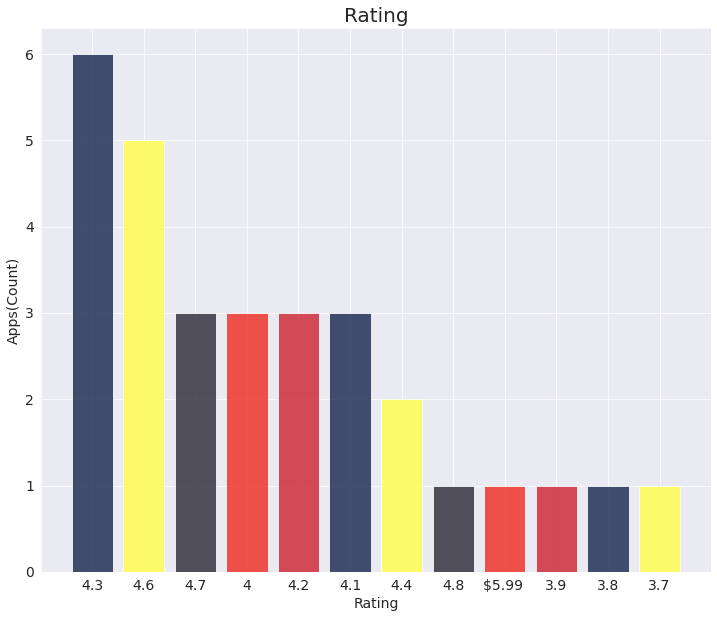

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(xsis,ysis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D'], alpha=0.8);
plt.title('Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Rating');

Order of apps based on their number of downloads

In [ ]:
Apps_with_Highest_rev = data.sort_values(by='Apps_Review_count', ascending=False).head(20)

In [ ]:
Apps_with_Highest_rev

,Apps_name,Apps_Rating,Apps_Downloads,Apps_Review_count
2,Duolingo: language lessons,4.6,100000000.0,13000000.0
22,Memrise Easy Language Learning,4.6,10000000.0,1460000.0
12,ClassDojo,4.8,10000000.0,566000.0
20,Kahoot! Play & Create Quizzes,4.7,50000000.0,509000.0
16,Quizlet: Languages & Vocab,4.6,10000000.0,475000.0
17,Elevate - Brain Training Games,4.6,10000000.0,409000.0
9,Udemy - Online Courses,4.4,10000000.0,366000.0
0,Khan Academy,4.3,10000000.0,157000.0
27,Lingokids: Kids Learning Games,4.3,10000000.0,153000.0
24,Coursera,4.1,10000000.0,133000.0


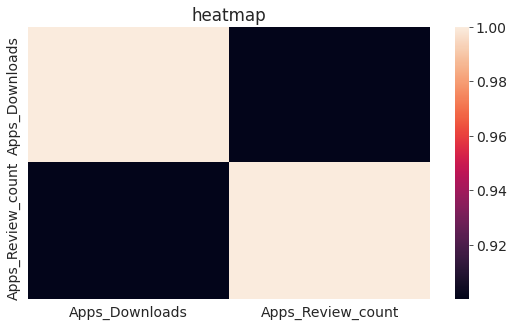

In [ ]:
sns.heatmap(data.corr())
plt.title('heatmap')
plt.show()

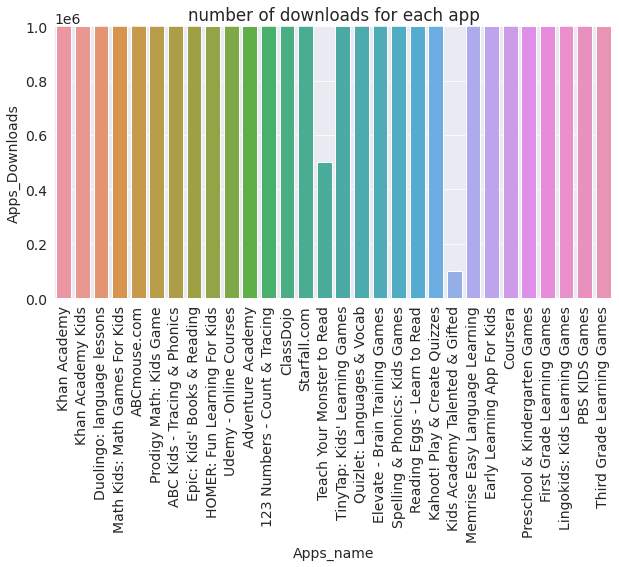

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Apps_name', y = 'Apps_Downloads', data = data)
plt.xticks(rotation = 90)
plt.ylim(0,1000000)
plt.title('number of downloads for each app')
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Apps_name', y = 'Apps_Rating', data = data)
plt.xticks(rotation = 90)
plt.ylim(0,5)
plt.title('Ratings for each app')
plt.show()

TypeError: ignored

<Figure size 720x360 with 0 Axes>